# Задачи:

### 1. Преобразовать данные в удобный формат для анализа.

### 2. Для каждой авиакомпании посчитать  общее количество перелетов.
#### 2.1 Вычислить какие самые популярные направления рейсов из Ростова.

### 3. Преобразовать данные в Tidy data.
#### 3.1 Отобразить данные перелётов в разрезе авиакомпаний и по месяцам.
#### 3.2 В какие месяцы наибольшее количество вылетов в другие страны .



#### Загружаем данные

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from datetime import datetime

In [4]:
data =pd.read_excel("table_air.xlsx", index_col=None, na_values=["NA"])

In [5]:
data

,Рейсы в Ростов,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Рейсы из Ростова,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Номер рейса,Тип ВС,Отпр,Приб,NaN,Период выполнения,Дни,Маршрут,Номер рейса,Тип ВС,Отпр,Приб,NaN,Период выполнения,Дни,Маршрут,NaN,NaN,NaN,NaN
1,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ZF-6194,B-767-300,05:30,08:00,NaN,06Май17\n06Май17,.....6.,АНТАЛЬЯ\nРОСТОВ,RL-8001,B-737-800W,03:10,04:45,NaN,08Янв17\n15Янв17,......7,РОСТОВ\nАНТАЛЬЯ,NaN,NaN,NaN,0.0
3,ZF-6192,B-757-200,05:30,08:00,NaN,29Май17\n23Окт17,1......,АНТАЛЬЯ\nРОСТОВ,ZF-6191,B-757-200,03:30,06:05,NaN,28Апр17\n12Май17,....5..,РОСТОВ\nАНТАЛЬЯ,NaN,NaN,NaN,NaN
4,ZF-6192,B-757-200,05:45,08:15,NaN,02Май17\n09Май17,.2.....,АНТАЛЬЯ\nРОСТОВ,ZF-6191,B-757-200,05:00,07:35,NaN,26Апр17\n26Апр17,..3....,РОСТОВ\nАНТАЛЬЯ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,IK-1768,B-737-800W,07:10,13:25,NaN,10Май17\n10Май17,..3....,ЭНФИДА\nРОСТОВ,ZF-6107,B-757-200,12:00,14:45,NaN,27Апр17\n12Окт17,...4...,РОСТОВ\nЭНФИДА,NaN,NaN,NaN,NaN
676,IK-1768,B-737-800W,07:10,13:25,NaN,22Май17\n22Май17,1......,ЭНФИДА\nРОСТОВ,N4-1767,B-737-800W,15:00,17:45,NaN,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА,NaN,NaN,NaN,NaN
677,N4-1768,B-737-800W,07:10,13:30,NaN,10Май17\n10Май17,..3....,ЭНФИДА\nРОСТОВ,IK-1767,B-737-800W,15:00,17:10,NaN,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА,NaN,NaN,NaN,NaN
678,N4-1768,B-737-800W,07:10,13:30,NaN,22Май17\n22Май17,1......,ЭНФИДА\nРОСТОВ,N4-1767,B-737-800W,15:00,17:45,NaN,22Май17\n22Май17,1......,РОСТОВ\nЭНФИДА,NaN,NaN,NaN,NaN


# 1. Преобразовать данные в удобный формат для анализа.

In [6]:
data.columns

Index(['Рейсы в Ростов', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Рейсы из Ростова', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [7]:
ROSTOV = data[['Рейсы в Ростов', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
   'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']]

In [8]:
FROM_ROSTOV = data[['Рейсы из Ростова', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       ]]


In [9]:
ROSTOV 

,Рейсы в Ростов,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут
1,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",NaN,NaN,NaN,NaN,NaN,NaN
2,ZF-6194,B-767-300,05:30,08:00,06Май17\n06Май17,.....6.,АНТАЛЬЯ\nРОСТОВ
3,ZF-6192,B-757-200,05:30,08:00,29Май17\n23Окт17,1......,АНТАЛЬЯ\nРОСТОВ
4,ZF-6192,B-757-200,05:45,08:15,02Май17\n09Май17,.2.....,АНТАЛЬЯ\nРОСТОВ
...,...,...,...,...,...,...,...
675,IK-1768,B-737-800W,07:10,13:25,10Май17\n10Май17,..3....,ЭНФИДА\nРОСТОВ
676,IK-1768,B-737-800W,07:10,13:25,22Май17\n22Май17,1......,ЭНФИДА\nРОСТОВ
677,N4-1768,B-737-800W,07:10,13:30,10Май17\n10Май17,..3....,ЭНФИДА\nРОСТОВ
678,N4-1768,B-737-800W,07:10,13:30,22Май17\n22Май17,1......,ЭНФИДА\nРОСТОВ


In [10]:
FROM_ROSTOV

,Рейсы из Ростова,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RL-8001,B-737-800W,03:10,04:45,08Янв17\n15Янв17,......7,РОСТОВ\nАНТАЛЬЯ
3,ZF-6191,B-757-200,03:30,06:05,28Апр17\n12Май17,....5..,РОСТОВ\nАНТАЛЬЯ
4,ZF-6191,B-757-200,05:00,07:35,26Апр17\n26Апр17,..3....,РОСТОВ\nАНТАЛЬЯ
...,...,...,...,...,...,...,...
675,ZF-6107,B-757-200,12:00,14:45,27Апр17\n12Окт17,...4...,РОСТОВ\nЭНФИДА
676,N4-1767,B-737-800W,15:00,17:45,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА
677,IK-1767,B-737-800W,15:00,17:10,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА
678,N4-1767,B-737-800W,15:00,17:45,22Май17\n22Май17,1......,РОСТОВ\nЭНФИДА


In [11]:
FROM_ROSTOV.insert(0, "Направление", "Рейсы из Ростова")

In [12]:
ROSTOV.insert(0, "Направление", "Рейсы в Ростов")

In [13]:
ROSTOV

,Направление,Рейсы в Ростов,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Рейсы в Ростов,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут
1,Рейсы в Ростов,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",NaN,NaN,NaN,NaN,NaN,NaN
2,Рейсы в Ростов,ZF-6194,B-767-300,05:30,08:00,06Май17\n06Май17,.....6.,АНТАЛЬЯ\nРОСТОВ
3,Рейсы в Ростов,ZF-6192,B-757-200,05:30,08:00,29Май17\n23Окт17,1......,АНТАЛЬЯ\nРОСТОВ
4,Рейсы в Ростов,ZF-6192,B-757-200,05:45,08:15,02Май17\n09Май17,.2.....,АНТАЛЬЯ\nРОСТОВ
...,...,...,...,...,...,...,...,...
675,Рейсы в Ростов,IK-1768,B-737-800W,07:10,13:25,10Май17\n10Май17,..3....,ЭНФИДА\nРОСТОВ
676,Рейсы в Ростов,IK-1768,B-737-800W,07:10,13:25,22Май17\n22Май17,1......,ЭНФИДА\nРОСТОВ
677,Рейсы в Ростов,N4-1768,B-737-800W,07:10,13:30,10Май17\n10Май17,..3....,ЭНФИДА\nРОСТОВ
678,Рейсы в Ростов,N4-1768,B-737-800W,07:10,13:30,22Май17\n22Май17,1......,ЭНФИДА\nРОСТОВ


In [14]:
ROSTOV.columns

Index(['Направление', 'Рейсы в Ростов', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [15]:
heads = ROSTOV.iloc[0:1].values.tolist()
heads

[['Рейсы в Ростов',
  'Номер рейса',
  'Тип ВС',
  'Отпр',
  'Приб',
  'Период выполнения',
  'Дни',
  'Маршрут']]

In [16]:
ROSTOV.columns = ['Направление',
  'Номер рейса',
  'Тип ВС',
  'Отпр',
  'Приб',
  'Период выполнения',
  'Дни',
  'Маршрут']

In [17]:
FROM_ROSTOV.columns = ['Направление',
  'Номер рейса',
  'Тип ВС',
  'Отпр',
  'Приб',
  'Период выполнения',
  'Дни',
  'Маршрут']

In [18]:
ROSTOV

,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут
0,Рейсы в Ростов,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут
1,Рейсы в Ростов,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",NaN,NaN,NaN,NaN,NaN,NaN
2,Рейсы в Ростов,ZF-6194,B-767-300,05:30,08:00,06Май17\n06Май17,.....6.,АНТАЛЬЯ\nРОСТОВ
3,Рейсы в Ростов,ZF-6192,B-757-200,05:30,08:00,29Май17\n23Окт17,1......,АНТАЛЬЯ\nРОСТОВ
4,Рейсы в Ростов,ZF-6192,B-757-200,05:45,08:15,02Май17\n09Май17,.2.....,АНТАЛЬЯ\nРОСТОВ
...,...,...,...,...,...,...,...,...
675,Рейсы в Ростов,IK-1768,B-737-800W,07:10,13:25,10Май17\n10Май17,..3....,ЭНФИДА\nРОСТОВ
676,Рейсы в Ростов,IK-1768,B-737-800W,07:10,13:25,22Май17\n22Май17,1......,ЭНФИДА\nРОСТОВ
677,Рейсы в Ростов,N4-1768,B-737-800W,07:10,13:30,10Май17\n10Май17,..3....,ЭНФИДА\nРОСТОВ
678,Рейсы в Ростов,N4-1768,B-737-800W,07:10,13:30,22Май17\n22Май17,1......,ЭНФИДА\nРОСТОВ


In [19]:
FROM_ROSTOV

,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут
0,Рейсы из Ростова,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут
1,Рейсы из Ростова,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Рейсы из Ростова,RL-8001,B-737-800W,03:10,04:45,08Янв17\n15Янв17,......7,РОСТОВ\nАНТАЛЬЯ
3,Рейсы из Ростова,ZF-6191,B-757-200,03:30,06:05,28Апр17\n12Май17,....5..,РОСТОВ\nАНТАЛЬЯ
4,Рейсы из Ростова,ZF-6191,B-757-200,05:00,07:35,26Апр17\n26Апр17,..3....,РОСТОВ\nАНТАЛЬЯ
...,...,...,...,...,...,...,...,...
675,Рейсы из Ростова,ZF-6107,B-757-200,12:00,14:45,27Апр17\n12Окт17,...4...,РОСТОВ\nЭНФИДА
676,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА
677,Рейсы из Ростова,IK-1767,B-737-800W,15:00,17:10,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА
678,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,22Май17\n22Май17,1......,РОСТОВ\nЭНФИДА


In [20]:
ROSTOV_copy = ROSTOV.copy() 
FROM_ROSTOV_copy = FROM_ROSTOV.copy()

In [21]:
ROSTOV_copy= ROSTOV_copy.drop([0])

In [22]:
FROM_ROSTOV_copy = FROM_ROSTOV_copy.drop([0])

In [23]:
ROSTOV_copy

,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут
1,Рейсы в Ростов,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",NaN,NaN,NaN,NaN,NaN,NaN
2,Рейсы в Ростов,ZF-6194,B-767-300,05:30,08:00,06Май17\n06Май17,.....6.,АНТАЛЬЯ\nРОСТОВ
3,Рейсы в Ростов,ZF-6192,B-757-200,05:30,08:00,29Май17\n23Окт17,1......,АНТАЛЬЯ\nРОСТОВ
4,Рейсы в Ростов,ZF-6192,B-757-200,05:45,08:15,02Май17\n09Май17,.2.....,АНТАЛЬЯ\nРОСТОВ
5,Рейсы в Ростов,U6-1058,A-321,06:05,08:25,13Апр17\n13Апр17,...4...,АНТАЛЬЯ\nРОСТОВ
...,...,...,...,...,...,...,...,...
675,Рейсы в Ростов,IK-1768,B-737-800W,07:10,13:25,10Май17\n10Май17,..3....,ЭНФИДА\nРОСТОВ
676,Рейсы в Ростов,IK-1768,B-737-800W,07:10,13:25,22Май17\n22Май17,1......,ЭНФИДА\nРОСТОВ
677,Рейсы в Ростов,N4-1768,B-737-800W,07:10,13:30,10Май17\n10Май17,..3....,ЭНФИДА\nРОСТОВ
678,Рейсы в Ростов,N4-1768,B-737-800W,07:10,13:30,22Май17\n22Май17,1......,ЭНФИДА\nРОСТОВ


In [24]:
FROM_ROSTOV_copy

,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут
1,Рейсы из Ростова,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Рейсы из Ростова,RL-8001,B-737-800W,03:10,04:45,08Янв17\n15Янв17,......7,РОСТОВ\nАНТАЛЬЯ
3,Рейсы из Ростова,ZF-6191,B-757-200,03:30,06:05,28Апр17\n12Май17,....5..,РОСТОВ\nАНТАЛЬЯ
4,Рейсы из Ростова,ZF-6191,B-757-200,05:00,07:35,26Апр17\n26Апр17,..3....,РОСТОВ\nАНТАЛЬЯ
5,Рейсы из Ростова,ZF-6191,B-757-200,05:00,07:35,24Май17\n11Окт17,..3....,РОСТОВ\nАНТАЛЬЯ
...,...,...,...,...,...,...,...,...
675,Рейсы из Ростова,ZF-6107,B-757-200,12:00,14:45,27Апр17\n12Окт17,...4...,РОСТОВ\nЭНФИДА
676,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА
677,Рейсы из Ростова,IK-1767,B-737-800W,15:00,17:10,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА
678,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,22Май17\n22Май17,1......,РОСТОВ\nЭНФИДА


In [1]:
#ROSTOV_copy['Номер рейса'].unique()


In [145]:
ROSTOV_copy['Номер рейса'] = ROSTOV_copy['Номер рейса'].replace(np.nan, 'empty')


In [27]:
ROSTOV_copy['Город, Страна, Часовой пояс'] = [i if len(i)> 10 else '' for i in ROSTOV_copy['Номер рейса'] ]
      

In [28]:
list1 = ROSTOV_copy['Город, Страна, Часовой пояс'].values.tolist()


list2 = []
range(len(list1))

for i in range(len(list1)):
    if list1[i] !='':
        list2.append(list1[i])
    else:
        list2.append(list2[i-1])



In [29]:
ROSTOV_copy['Город, Страна, Часовой пояс'] = list2

In [2]:
#ROSTOV_copy.head(55)

In [3]:
#ROSTOV_copy

In [32]:
FROM_ROSTOV_copy['Город, Страна, Часовой пояс'] = ROSTOV_copy['Город, Страна, Часовой пояс']

In [4]:
#FROM_ROSTOV_copy

#### соединяем две отдельных базы в одну

In [34]:
ROSTOV_TABLE = pd.concat([ROSTOV_copy,FROM_ROSTOV_copy])
ROSTOV_TABLE.reset_index(drop=True, inplace=True)
ROSTOV_TABLE
 

,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут,"Город, Страна, Часовой пояс"
0,Рейсы в Ростов,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",NaN,NaN,NaN,NaN,NaN,NaN,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
1,Рейсы в Ростов,ZF-6194,B-767-300,05:30,08:00,06Май17\n06Май17,.....6.,АНТАЛЬЯ\nРОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
2,Рейсы в Ростов,ZF-6192,B-757-200,05:30,08:00,29Май17\n23Окт17,1......,АНТАЛЬЯ\nРОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
3,Рейсы в Ростов,ZF-6192,B-757-200,05:45,08:15,02Май17\n09Май17,.2.....,АНТАЛЬЯ\nРОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
4,Рейсы в Ростов,U6-1058,A-321,06:05,08:25,13Апр17\n13Апр17,...4...,АНТАЛЬЯ\nРОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
...,...,...,...,...,...,...,...,...,...
1353,Рейсы из Ростова,ZF-6107,B-757-200,12:00,14:45,27Апр17\n12Окт17,...4...,РОСТОВ\nЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1354,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1355,Рейсы из Ростова,IK-1767,B-737-800W,15:00,17:10,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1356,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,22Май17\n22Май17,1......,РОСТОВ\nЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"


In [35]:
ROSTOV_TABLE['Тип ВС'].isna().sum()


206

In [36]:
ROSTOV_TABLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Направление                  1358 non-null   object
 1   Номер рейса                  1269 non-null   object
 2   Тип ВС                       1152 non-null   object
 3   Отпр                         1152 non-null   object
 4   Приб                         1152 non-null   object
 5   Период выполнения            1152 non-null   object
 6   Дни                          1152 non-null   object
 7   Маршрут                      1152 non-null   object
 8   Город, Страна, Часовой пояс  1358 non-null   object
dtypes: object(9)
memory usage: 95.6+ KB


In [37]:
ROSTOV_TABLE = ROSTOV_TABLE.dropna(subset=['Тип ВС'])

In [38]:
ROSTOV_TABLE

,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут,"Город, Страна, Часовой пояс"
1,Рейсы в Ростов,ZF-6194,B-767-300,05:30,08:00,06Май17\n06Май17,.....6.,АНТАЛЬЯ\nРОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
2,Рейсы в Ростов,ZF-6192,B-757-200,05:30,08:00,29Май17\n23Окт17,1......,АНТАЛЬЯ\nРОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
3,Рейсы в Ростов,ZF-6192,B-757-200,05:45,08:15,02Май17\n09Май17,.2.....,АНТАЛЬЯ\nРОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
4,Рейсы в Ростов,U6-1058,A-321,06:05,08:25,13Апр17\n13Апр17,...4...,АНТАЛЬЯ\nРОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
5,Рейсы в Ростов,KK-6739,A-321,06:45,09:15,27Апр17\n05Окт17,...4...,АНТАЛЬЯ\nРОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
...,...,...,...,...,...,...,...,...,...
1353,Рейсы из Ростова,ZF-6107,B-757-200,12:00,14:45,27Апр17\n12Окт17,...4...,РОСТОВ\nЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1354,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1355,Рейсы из Ростова,IK-1767,B-737-800W,15:00,17:10,10Май17\n10Май17,..3....,РОСТОВ\nЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1356,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,22Май17\n22Май17,1......,РОСТОВ\nЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"


In [39]:
pd.set_option('mode.chained_assignment',None)
ROSTOV_TABLE['Период выполнения'] = ROSTOV_TABLE['Период выполнения'].astype('string')
ROSTOV_TABLE['Дни'] = ROSTOV_TABLE['Дни'].astype('string')
ROSTOV_TABLE['Маршрут'] = ROSTOV_TABLE['Маршрут'].astype('string')

ROSTOV_TABLE['Номер рейса'] = ROSTOV_TABLE['Номер рейса'].astype('string')


In [40]:
ROSTOV_TABLE

,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут,"Город, Страна, Часовой пояс"
1,Рейсы в Ростов,ZF-6194,B-767-300,05:30,08:00,06Май17 06Май17,.....6.,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
2,Рейсы в Ростов,ZF-6192,B-757-200,05:30,08:00,29Май17 23Окт17,1......,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
3,Рейсы в Ростов,ZF-6192,B-757-200,05:45,08:15,02Май17 09Май17,.2.....,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
4,Рейсы в Ростов,U6-1058,A-321,06:05,08:25,13Апр17 13Апр17,...4...,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
5,Рейсы в Ростов,KK-6739,A-321,06:45,09:15,27Апр17 05Окт17,...4...,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
...,...,...,...,...,...,...,...,...,...
1353,Рейсы из Ростова,ZF-6107,B-757-200,12:00,14:45,27Апр17 12Окт17,...4...,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1354,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,10Май17 10Май17,..3....,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1355,Рейсы из Ростова,IK-1767,B-737-800W,15:00,17:10,10Май17 10Май17,..3....,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1356,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,22Май17 22Май17,1......,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"


In [41]:
eng = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep','Oct', 'Nov', 'Dec']
rus = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл','Авг', 'Сен','Окт', 'Ноя', 'Дек']
    

In [42]:
for i in range(len(rus)):
    ROSTOV_TABLE['Период выполнения'] = ROSTOV_TABLE['Период выполнения'].str.replace(rus[i],eng[i])

In [43]:
ROSTOV_TABLE

,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут,"Город, Страна, Часовой пояс"
1,Рейсы в Ростов,ZF-6194,B-767-300,05:30,08:00,06May17 06May17,.....6.,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
2,Рейсы в Ростов,ZF-6192,B-757-200,05:30,08:00,29May17 23Oct17,1......,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
3,Рейсы в Ростов,ZF-6192,B-757-200,05:45,08:15,02May17 09May17,.2.....,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
4,Рейсы в Ростов,U6-1058,A-321,06:05,08:25,13Apr17 13Apr17,...4...,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
5,Рейсы в Ростов,KK-6739,A-321,06:45,09:15,27Apr17 05Oct17,...4...,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2"
...,...,...,...,...,...,...,...,...,...
1353,Рейсы из Ростова,ZF-6107,B-757-200,12:00,14:45,27Apr17 12Oct17,...4...,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1354,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,10May17 10May17,..3....,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1355,Рейсы из Ростова,IK-1767,B-737-800W,15:00,17:10,10May17 10May17,..3....,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"
1356,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,22May17 22May17,1......,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1"


# 2. Для каждой авиакомпании посчитать  общее количество перелетов.

#### напишем функцию которая посчитает количество перелетов для каждой строки

In [44]:
def flights_count(days,period):
    
    daylst=[]
    daysnames = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    daysnum = ['1','2','3','4','5','6','7']
    for i in days:
        daylst.append(i)
    

    for day in daylst:
        if day != '.':
            index = daylst.index(day)
            daylst[index] = daysnames[index]
        
    fly_dates = period.split("\n")
    date_from = fly_dates[0]
    date_to = fly_dates[1]
    date_range = pd.date_range(date_from, date_to, freq="D")
    date_range =date_range.day_name()

    listdates = []
    for i in date_range:
        listdates.append(i)

    count = 0
    for datename in listdates:
        if datename in daylst:
            count +=1
    return count

In [45]:
ROSTOV_TABLE['Flights'] = ROSTOV_TABLE.apply(lambda x: flights_count(x['Дни'],x['Период выполнения']),axis=1)

In [46]:
ROSTOV_TABLE

,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут,"Город, Страна, Часовой пояс",Flights
1,Рейсы в Ростов,ZF-6194,B-767-300,05:30,08:00,06May17 06May17,.....6.,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",1
2,Рейсы в Ростов,ZF-6192,B-757-200,05:30,08:00,29May17 23Oct17,1......,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",22
3,Рейсы в Ростов,ZF-6192,B-757-200,05:45,08:15,02May17 09May17,.2.....,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",2
4,Рейсы в Ростов,U6-1058,A-321,06:05,08:25,13Apr17 13Apr17,...4...,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",1
5,Рейсы в Ростов,KK-6739,A-321,06:45,09:15,27Apr17 05Oct17,...4...,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",24
...,...,...,...,...,...,...,...,...,...,...
1353,Рейсы из Ростова,ZF-6107,B-757-200,12:00,14:45,27Apr17 12Oct17,...4...,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",25
1354,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,10May17 10May17,..3....,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",1
1355,Рейсы из Ростова,IK-1767,B-737-800W,15:00,17:10,10May17 10May17,..3....,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",1
1356,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,22May17 22May17,1......,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",1


In [5]:
#for i in ROSTOV_TABLE['Номер рейса'].unique():
    #print(i)

In [48]:
ROSTOV_TABLE['company_short'] =ROSTOV_TABLE['Номер рейса'].apply(lambda x: x.split("-")[0])

In [49]:
ROSTOV_TABLE['company_short'].unique()

array(['ZF', 'U6', 'KK', 'RL', '5N', 'NN', '7R', 'DP', 'Y7', 'H7', 'IK',
       'FZ', 'EL', 'UGG', '*IO', 'ARN', '6R', 'FV', '*SU', 'UT', 'S7',
       '*LY', '*QR', '*EK', '*AB', '*A3', '*IB', '*BA', '*SQ', '*EY',
       '*JL', '*RJ', 'SU', 'N4', 'OK', 'QS', 'A3', 'YC', 'TK', 'HY',
       '*AF', '*KL', '*AZ'], dtype=object)

In [50]:
ROSTOV_TABLE['company_short'] = ROSTOV_TABLE['company_short'].str.replace("*","")
ROSTOV_TABLE['company_short'].unique()

array(['ZF', 'U6', 'KK', 'RL', '5N', 'NN', '7R', 'DP', 'Y7', 'H7', 'IK',
       'FZ', 'EL', 'UGG', 'IO', 'ARN', '6R', 'FV', 'SU', 'UT', 'S7', 'LY',
       'QR', 'EK', 'AB', 'A3', 'IB', 'BA', 'SQ', 'EY', 'JL', 'RJ', 'N4',
       'OK', 'QS', 'YC', 'TK', 'HY', 'AF', 'KL', 'AZ'], dtype=object)

In [64]:
ROSTOV_TABLE['country'] = ROSTOV_TABLE['Город, Страна, Часовой пояс'].apply(lambda x: x.split(",")[1])

In [65]:
ROSTOV_TABLE.country.unique()


array([' ТУРЦИЯ', ' АЗЕРБАЙДЖАНСКАЯ РЕСПУБЛИКА', ' ТАИЛАНД',
       ' ИСПАНИЯ И КАНАРСКИЕ ОСТРОВА', ' БОЛГАРИЯ', ' ИТАЛИЯ', ' ИНДИЯ',
       ' РЕСПУБЛИКА АРМЕНИЯ', ' ОБЪЕДИНЕННЫЕ АРАБСКИЕ ЭМИРАТЫ',
       ' РОССИЙСКАЯ ФЕДЕРАЦИЯ', ' ГРЕЦИЯ', ' ВЕЛИКОБРИТАНИЯ',
       ' ЧЕШСКАЯ РЕСПУБЛИКА', ' РЕСПУБЛИКА УЗБЕКИСТАН',
       ' РЕСПУБЛИКА ГРУЗИЯ', ' ИЗРАИЛЬ', ' РЕСПУБЛИКА ТАДЖИКИСТАН',
       ' ТУНИС'], dtype=object)

In [68]:
ROSTOV_TABLE['country'] = ROSTOV_TABLE['country'].apply(lambda x:"" + x[1:] )
ROSTOV_TABLE.country.unique()


array(['ТУРЦИЯ', 'АЗЕРБАЙДЖАНСКАЯ РЕСПУБЛИКА', 'ТАИЛАНД',
       'ИСПАНИЯ И КАНАРСКИЕ ОСТРОВА', 'БОЛГАРИЯ', 'ИТАЛИЯ', 'ИНДИЯ',
       'РЕСПУБЛИКА АРМЕНИЯ', 'ОБЪЕДИНЕННЫЕ АРАБСКИЕ ЭМИРАТЫ',
       'РОССИЙСКАЯ ФЕДЕРАЦИЯ', 'ГРЕЦИЯ', 'ВЕЛИКОБРИТАНИЯ',
       'ЧЕШСКАЯ РЕСПУБЛИКА', 'РЕСПУБЛИКА УЗБЕКИСТАН', 'РЕСПУБЛИКА ГРУЗИЯ',
       'ИЗРАИЛЬ', 'РЕСПУБЛИКА ТАДЖИКИСТАН', 'ТУНИС'], dtype=object)

#### Загружаем таблицу соответствий коротких наименований и полных названий  авиакомпаний

In [69]:
Companies =pd.read_excel("Companies.xlsx")
Companies.head(5)

,COMPANY NAME,COUNTRY / TERRITORY,2-LETTER CODE,ACCOUNTING CODE (PAX),AIRLINE PREFIX CODE
0,AZUR air Limited Liability Company,Russian Federation,ZF,37.0,37.0
1,"Joint Stock Company ""Ural Airlines""",Russian Federation,U6,262.0,262.0
2,Атласджет Эйрлайнз (Atlasjet Airlines),Turkey,KK,NaN,NaN
3,JSC Royal Flight Airlines,Russian Federation,RL,750.0,750.0
4,Joint Stock Company Smartavia Airlines,Russian Federation,5N,316.0,316.0


In [70]:
Companies.columns

Index(['COMPANY NAME', 'COUNTRY / TERRITORY', '2-LETTER CODE',
       'ACCOUNTING CODE (PAX)', 'AIRLINE PREFIX CODE'],
      dtype='object')

In [71]:
Companies.columns = ['COMPANY NAME', 'COUNTRY / TERRITORY', 'company_short','ACCOUNTING CODE (PAX)', 'AIRLINE PREFIX CODE']

In [72]:
Companies = Companies[['COMPANY NAME','company_short']]
Companies.head(5)

,COMPANY NAME,company_short
0,AZUR air Limited Liability Company,ZF
1,"Joint Stock Company ""Ural Airlines""",U6
2,Атласджет Эйрлайнз (Atlasjet Airlines),KK
3,JSC Royal Flight Airlines,RL
4,Joint Stock Company Smartavia Airlines,5N


#### Соединяем названия авиакомпаний с короткими названиями в наших данных

In [73]:
flights_merged = pd.merge(ROSTOV_TABLE,Companies, how = 'left', on = 'company_short')

In [74]:
flights_merged


,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут,"Город, Страна, Часовой пояс",Flights,company_short,country,COMPANY NAME
0,Рейсы в Ростов,ZF-6194,B-767-300,05:30,08:00,06May17 06May17,.....6.,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",1,ZF,ТУРЦИЯ,AZUR air Limited Liability Company
1,Рейсы в Ростов,ZF-6192,B-757-200,05:30,08:00,29May17 23Oct17,1......,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",22,ZF,ТУРЦИЯ,AZUR air Limited Liability Company
2,Рейсы в Ростов,ZF-6192,B-757-200,05:45,08:15,02May17 09May17,.2.....,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",2,ZF,ТУРЦИЯ,AZUR air Limited Liability Company
3,Рейсы в Ростов,U6-1058,A-321,06:05,08:25,13Apr17 13Apr17,...4...,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",1,U6,ТУРЦИЯ,"Joint Stock Company ""Ural Airlines"""
4,Рейсы в Ростов,KK-6739,A-321,06:45,09:15,27Apr17 05Oct17,...4...,АНТАЛЬЯ РОСТОВ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",24,KK,ТУРЦИЯ,Атласджет Эйрлайнз (Atlasjet Airlines)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,Рейсы из Ростова,ZF-6107,B-757-200,12:00,14:45,27Apr17 12Oct17,...4...,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",25,ZF,ТУНИС,AZUR air Limited Liability Company
1148,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,10May17 10May17,..3....,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",1,N4,ТУНИС,"LLC ""Nord Wind"""
1149,Рейсы из Ростова,IK-1767,B-737-800W,15:00,17:10,10May17 10May17,..3....,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",1,IK,ТУНИС,IKAR
1150,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,22May17 22May17,1......,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",1,N4,ТУНИС,"LLC ""Nord Wind"""


In [75]:
flights_merged['Flights'].sum()

38186

# Количетсво перелетов для каждой авиакомпании.

In [123]:
Aviacompanies_count = flights_merged.groupby(['COMPANY NAME'])['Flights'].sum().reset_index()
Aviacompanies_count


,COMPANY NAME,Flights
0,AZUR air Limited Liability Company,723
1,Aegean Airlines,1855
2,Aeronexus Corporation.,2
3,Air Berlin,1156
4,Air France,1400
5,Alia - The Royal Jordanian Airlines dba Royal ...,397
6,"Aviakompaniya Pobeda, OOO",2110
7,British Airways p.l.c.,1061
8,"Closed Joint Stock Company ""IrAero""",12
9,"Czech Airlines a.s,. CSA",271


# 2.1 Вычислить какие самые популярные направления рейсов из Ростова

In [101]:
Popular_flights_not_Russia = flights_merged[(flights_merged['country'] != 'РОССИЙСКАЯ ФЕДЕРАЦИЯ') & (flights_merged['Направление'] == 'Рейсы из Ростова') ]
Popular_flights_not_Russia


,Направление,Номер рейса,Тип ВС,Отпр,Приб,Период выполнения,Дни,Маршрут,"Город, Страна, Часовой пояс",Flights,company_short,country,COMPANY NAME
562,Рейсы из Ростова,RL-8001,B-737-800W,03:10,04:45,08Jan17 15Jan17,......7,РОСТОВ АНТАЛЬЯ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",2,RL,ТУРЦИЯ,JSC Royal Flight Airlines
563,Рейсы из Ростова,ZF-6191,B-757-200,03:30,06:05,28Apr17 12May17,....5..,РОСТОВ АНТАЛЬЯ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",3,ZF,ТУРЦИЯ,AZUR air Limited Liability Company
564,Рейсы из Ростова,ZF-6191,B-757-200,05:00,07:35,26Apr17 26Apr17,..3....,РОСТОВ АНТАЛЬЯ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",1,ZF,ТУРЦИЯ,AZUR air Limited Liability Company
565,Рейсы из Ростова,ZF-6191,B-757-200,05:00,07:35,24May17 11Oct17,..3....,РОСТОВ АНТАЛЬЯ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",21,ZF,ТУРЦИЯ,AZUR air Limited Liability Company
566,Рейсы из Ростова,ZF-6191,B-757-200,05:20,07:50,20May17 14Oct17,.....6.,РОСТОВ АНТАЛЬЯ,"АНТАЛЬЯ, ТУРЦИЯ, UTC +2",22,ZF,ТУРЦИЯ,AZUR air Limited Liability Company
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,Рейсы из Ростова,ZF-6107,B-757-200,12:00,14:45,27Apr17 12Oct17,...4...,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",25,ZF,ТУНИС,AZUR air Limited Liability Company
1148,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,10May17 10May17,..3....,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",1,N4,ТУНИС,"LLC ""Nord Wind"""
1149,Рейсы из Ростова,IK-1767,B-737-800W,15:00,17:10,10May17 10May17,..3....,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",1,IK,ТУНИС,IKAR
1150,Рейсы из Ростова,N4-1767,B-737-800W,15:00,17:45,22May17 22May17,1......,РОСТОВ ЭНФИДА,"ЭНФИДА, ТУНИС, UTC +1",1,N4,ТУНИС,"LLC ""Nord Wind"""


In [103]:
Popular_flights_not_Russia_grouped = Popular_flights_not_Russia.groupby(['country'])['Flights'].sum().reset_index().sort_values(by = ['Flights'], ascending = False)
Popular_flights_not_Russia_grouped


,country,Flights
15,ТУРЦИЯ,724
9,РЕСПУБЛИКА АРМЕНИЯ,317
4,ИЗРАИЛЬ,208
16,ЧЕШСКАЯ РЕСПУБЛИКА,136
0,АЗЕРБАЙДЖАНСКАЯ РЕСПУБЛИКА,124
3,ГРЕЦИЯ,122
10,РЕСПУБЛИКА ГРУЗИЯ,94
8,ОБЪЕДИНЕННЫЕ АРАБСКИЕ ЭМИРАТЫ,87
12,РЕСПУБЛИКА УЗБЕКИСТАН,52
14,ТУНИС,29


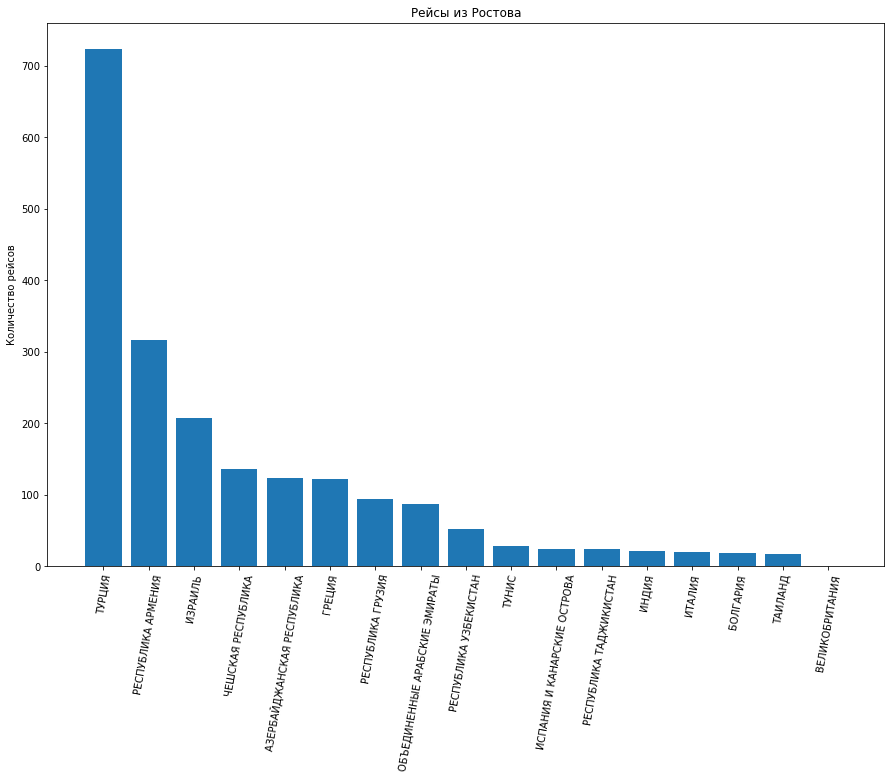

In [125]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 10))

plt.bar(Popular_flights_not_Russia_grouped['country'],Popular_flights_not_Russia_grouped['Flights'] ,capsize=5 )
plt.ylabel('Количество рейсов')
plt.xticks(rotation=80)
plt.title('Рейсы из Ростова в другие страны')
plt.show()

# 3. Преобразование данных в Tidy data.

In [126]:
flight_dates_dict= [] # даты в которые рейс совершает вылет
flight_number = [] # протянуть для каждой даты номер рейса
country = [] # протянуть список стран
company_names = [] # протянуть имена компаний
plane_type = [] # протянуть  тип воздушного средства
flight_direction = []

for i in range(len(flights_merged)):
    flight_no=flights_merged['Номер рейса'].tolist()[i]
    dates1 = flights_merged['Период выполнения'][i]
    days1 = flights_merged['Дни'][i]
    company1 = flights_merged['COMPANY NAME'][i]
    country1 = flights_merged['country'][i]
    direction = flights_merged['Направление'][i]
    plane = flights_merged['Тип ВС'][i]
    
    dates_from_to = dates1.split("\n") 
    date_from = dates_from_to[0]
    date_to = dates_from_to[1]
    date_range = pd.date_range(date_from, date_to, freq="D")
    #date_range =date_range.day_name()

    daylst=[]
    daysnames = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    daysnum = ['1','2','3','4','5','6','7']
    for i in days1:
        daylst.append(i)   #каждый знак из текста сохраняем в список как часть списка ['1','.','.','.','.','.']
    
    for day in daylst:
        if day != '.':
            index = daylst.index(day) #из списка дней берет индекс дня недели который не равен точке
            daylst[index] = daysnames[index] #заменяет день недели который не является точкой на день недели текстом

    listdates = []
    for i in date_range:
        listdates.append(i)
    dates_add_list = []    #для добавления в итоговый список
    for i in listdates:
        if i.day_name() in daylst:
            dates_add_list.append(i)
            #print(i.strftime("%d/%m/%Y"))

    flight_number_add = len(dates_add_list)*[flight_no]  #для добавления в итоговый список
    company_add = len(dates_add_list)*[company1]  #для добавления в итоговый список
    country_add = len(dates_add_list)*[country1]  #для добавления в итоговый список
    direction_add = len(dates_add_list)*[direction]  #для добавления в итоговый список
    plane_add = len(dates_add_list)*[plane]  #для добавления в итоговый список
    
    flight_dates_dict+=(dates_add_list)
    flight_number+=(flight_number_add)
    company_names+=(company_add)
    country+=(country_add )
    plane_type+=(plane_add)
    flight_direction+=(direction_add)


In [127]:
dict_for_dataframe = {'flight_dates':flight_dates_dict,'flight_number':flight_number,'company_name':company_names,'country':country,'flight_direction' : flight_direction}
new_data = pd.DataFrame(dict_for_dataframe)

In [128]:
new_data['month'] = new_data['flight_dates'].apply( lambda x : x.month_name())


In [129]:
new_data

,flight_dates,flight_number,company_name,country,flight_direction,month
0,2017-05-06,ZF-6194,AZUR air Limited Liability Company,ТУРЦИЯ,Рейсы в Ростов,May
1,2017-05-29,ZF-6192,AZUR air Limited Liability Company,ТУРЦИЯ,Рейсы в Ростов,May
2,2017-06-05,ZF-6192,AZUR air Limited Liability Company,ТУРЦИЯ,Рейсы в Ростов,June
3,2017-06-12,ZF-6192,AZUR air Limited Liability Company,ТУРЦИЯ,Рейсы в Ростов,June
4,2017-06-19,ZF-6192,AZUR air Limited Liability Company,ТУРЦИЯ,Рейсы в Ростов,June
...,...,...,...,...,...,...
38181,2017-10-12,ZF-6107,AZUR air Limited Liability Company,ТУНИС,Рейсы из Ростова,October
38182,2017-05-10,N4-1767,"LLC ""Nord Wind""",ТУНИС,Рейсы из Ростова,May
38183,2017-05-10,IK-1767,IKAR,ТУНИС,Рейсы из Ростова,May
38184,2017-05-22,N4-1767,"LLC ""Nord Wind""",ТУНИС,Рейсы из Ростова,May


# 3.1 Отобразить данные перелётов в разрезе авиакомпаний и по месяцам.


In [136]:
new_data_grouped = new_data.groupby(['company_name', 'month'])['flight_number'].count().reset_index()
new_data_grouped
new_data_pivot = new_data_grouped.pivot(columns = 'month', index = 'company_name', values = 'flight_number').reset_index()
new_data_pivot = new_data_pivot[['company_name','January','February','March','April','May','June','July','August','September','October','November','December']]

new_data_pivot

month,company_name,January,February,March,April,May,June,July,August,September,October,November,December
0,AZUR air Limited Liability Company,27.0,21.0,29.0,40.0,94.0,110.0,118.0,114.0,109.0,59.0,NaN,2.0
1,Aegean Airlines,169.0,144.0,171.0,140.0,147.0,150.0,157.0,159.0,152.0,143.0,146.0,177.0
2,Aeronexus Corporation.,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Air Berlin,80.0,68.0,87.0,101.0,112.0,108.0,109.0,112.0,108.0,105.0,82.0,84.0
4,Air France,143.0,140.0,147.0,120.0,124.0,120.0,124.0,124.0,120.0,116.0,60.0,62.0
5,Alia - The Royal Jordanian Airlines dba Royal ...,NaN,NaN,9.0,51.0,58.0,56.0,57.0,58.0,56.0,52.0,NaN,NaN
6,"Aviakompaniya Pobeda, OOO",244.0,224.0,248.0,228.0,232.0,120.0,124.0,124.0,144.0,228.0,82.0,112.0
7,British Airways p.l.c.,58.0,48.0,68.0,102.0,116.0,112.0,114.0,116.0,112.0,106.0,47.0,62.0
8,"Closed Joint Stock Company ""IrAero""",12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Czech Airlines a.s,. CSA",26.0,14.0,21.0,26.0,26.0,26.0,36.0,35.0,34.0,24.0,NaN,3.0


# 3.2 В какие месяцы наибольшее количество вылетов в другие страны .

In [139]:
Popular_months_not_Russia = new_data[(new_data['country'] != 'РОССИЙСКАЯ ФЕДЕРАЦИЯ')].groupby('month')['flight_number'].count().reset_index()
Popular_months_not_Russia

,month,flight_number
0,April,308
1,August,475
2,December,159
3,February,215
4,January,287
5,July,476
6,June,449
7,March,270
8,May,446
9,November,126


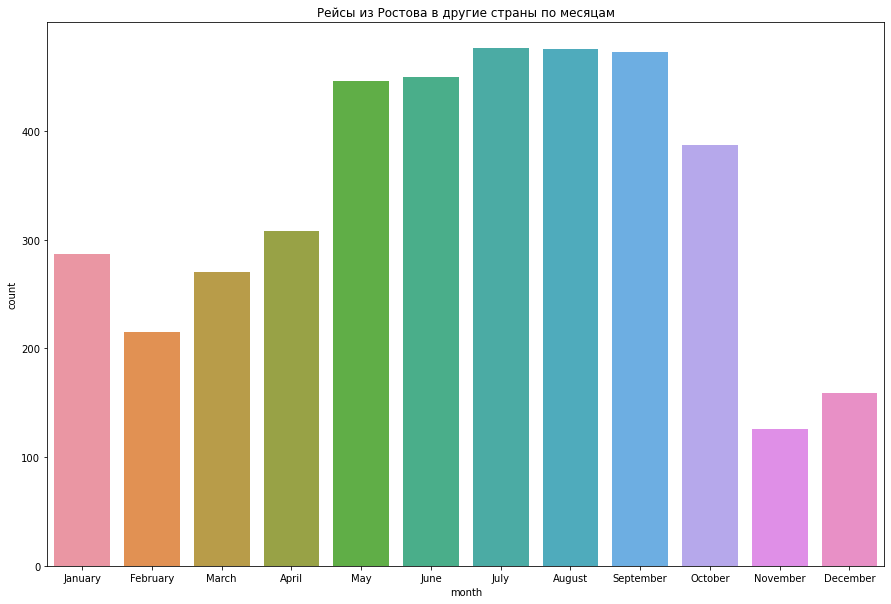

In [144]:
plt.figure(figsize=(15, 10))


month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(x = "month", data = new_data[(new_data['country'] != 'РОССИЙСКАЯ ФЕДЕРАЦИЯ')], order = month_order)
plt.title('Рейсы из Ростова в другие страны по месяцам')
plt.show()